<a href="https://colab.research.google.com/github/nkrj01/Models-from-scratch/blob/main/Neural_network_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In this notebook, I've implemented a dense neural network from scratch for binary classification problem using the Autodiff algorithm. The algorithm is presented twice: the first version is hard-coded but offers a simpler understanding for someone learning how to implement backpropagation. The second version is more flexible, allowing users to easily adjust the number of hidden layers and nodes in each layer. This flexibility enhances customization while maintaining readability.

The model was succesfully able to classify the breast cancer data from Sk-learn with ~97% accuracy

Finally, the NN computed manually was compared with NN computed using Tensorflows Gradient tape. Both models performed almost identically for the given dataset (see results)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Helper Functions**

In [ ]:
def sigma(z):
  # activation function
  a = 1/(1 + np.exp(-z))
  return a

def make_binary(a):
  # converting activation to binaries for final result
  if a >= 0.5:
    return 1
  else:
    return 0

def binary_entropy_loss(y_true, y):
  epsilon = 1e-15
  y = np.clip(y, epsilon, 1 - epsilon)
  loss = -(y_true*np.log(y) + (1-y_true)*np.log(1-y))
  return loss

def predict(x_test):
  # prediction using forward propagation
  a1 = x_test.reshape(-1, 1)
  z2 = np.matmul(W1, a1) + b1
  a2 = sigma(z2)
  z3 = np.matmul(W2, a2) + b2
  a3 = sigma(z3)
  z4 = np.matmul(W3, a3) + b3
  a4 = sigma(z4)
  y = make_binary(a4)
  return y

def accuracy(x_test, y_test):
  # Calculating binary accuracy of the model
  y_predict = []
  for row in x_test:
    y_predict.append(predict(row))

  y_predict = np.array(y_predict)
  matching_elements = (y_predict == y_test)
  count_matches = np.sum(matching_elements)
  accuracy = count_matches/x_test.shape[0]
  return accuracy

def predict_2(x_test):
  # prediction using forward propagation for 2nd version
  a = []
  z = []
  a.append(x_test.reshape(-1, 1))
  for i in range(n_total_layer-1):
    z.append(np.matmul(W[i], a[i]) + b[i])

    if i < n_total_layer-1:
      a.append(sigma(z[i]))

  y = make_binary(a[-1])
  return y

def accuracy_2(x_test, y_test):
  # Calculating binary accuracy of the model for 2nd version
  y_predict = []
  for row in x_test:
    y_predict.append(predict_2(row))

  y_predict = np.array(y_predict)
  matching_elements = (y_predict == y_test)
  count_matches = np.sum(matching_elements)
  accuracy = count_matches/x_test.shape[0]
  return accuracy

def accuracy_tf(y_predict, y_test):
  matching_elements = (y_predict == y_test)
  count_matches = np.sum(matching_elements)
  accuracy = count_matches/y_predict.shape[0]
  return accuracy

## **Load breast cancer classfication Data**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x_total, y_total = load_breast_cancer(return_X_y=True)
print(x_total.shape)
scaler = MinMaxScaler()
x_total = scaler.fit_transform(x_total)
x, x_test, y_true, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=42)

(569, 30)


## **Algorithm-first version**


In [ ]:
# Define neural network
n_hidden_layer = 2
n_input_layer = x.shape[1]
n_layer_2 = 8
n_layer_3 = 4
n_output_layer = 1

# initiate weights
W1_shape = (n_layer_2, n_input_layer)
W1 = np.random.uniform(-1, 1, W1_shape)
b1_shape = (n_layer_2, 1)
b1 = np.random.uniform(-1, 1, b1_shape)
W2_shape = (n_layer_3, n_layer_2)
W2 = np.random.uniform(-1, 1, W2_shape)
b2_shape = (n_layer_3, 1)
b2 = np.random.rand(*b2_shape)
W3_shape = (n_output_layer, n_layer_3)
W3 = np.random.uniform(-1, 1, W3_shape)
b3_shape = (n_output_layer, 1)
b3 = np.random.rand(*b3_shape)

alpha = 0.1 # learning rate
n_iteration = 100
epsilon = 1e-2
m = x.shape[0] # number of training examples
avg_loss_list = []
iteration_num_list = []
current_average_loss = 69

for iteration in range(n_iteration):
  total_loss = 0
  for row in range(m):

    # forward propagation
    a1 = x[row, :].reshape(-1, 1)
    z2 = np.matmul(W1, a1) + b1
    a2 = sigma(z2)
    z3 = np.matmul(W2, a2) + b2
    a3 = sigma(z3)
    z4 = np.matmul(W3, a3) + b3
    y = sigma(z4) # y = a4
    loss = binary_entropy_loss(y_true[row], y).item()
    total_loss = total_loss + loss

    # back propagation
    Dz4 = y - y_true[row]
    Db3 = Dz4
    DW3 = np.matmul(Dz4, a3.T)
    Da3 = np.matmul(W3.T, Dz4)
    Dz3 = Da3*a3*(1-a3) # element wise multiplication
    Db2 = Dz3
    DW2 = np.matmul(Dz3, a2.T)
    Da2 = np.matmul(W2.T, Dz3)
    Dz2 = Da2*a2*(1-a2) # element wise multiplication
    Db1 = Dz2
    DW1 = np.matmul(Dz2, a1.T)

    # update
    W1 = W1 - alpha*DW1
    b1 = b1 - alpha*Db1
    W2 = W2 - alpha*DW2
    b2 = b2 - alpha*Db2
    W3 = W3 - alpha*DW3
    b3 = b3 - alpha*Db3

  avg_loss = total_loss/m
  avg_loss_list.append(avg_loss)
  iteration_num_list.append(iteration)
  if abs(current_average_loss - avg_loss)/avg_loss < epsilon:
    break
  else:
    current_average_loss = avg_loss

# plot avg loss vs iteration
plt.scatter(iteration_num_list, avg_loss_list)

# test accuracy
accuracy(x_test, y_test)

## **Algorithm-second version**

In [ ]:
# user define
# neural network architecture
n_hidden_layer = 2
n_input_layer = x.shape[1]
n_layer_2 = 6
n_layer_3 = 4
# n_layer_4 = 2 # Example of how to add more layers
n_output_layer = 1
n_total_layer = n_hidden_layer + 2

# update the list below with appropriate numbers of hidden layers as defined above
n_neuron = [n_input_layer, n_layer_2, n_layer_3, n_output_layer]

# initiate weights
W = []
b = []
for i in range(n_total_layer-1):
  W.append(np.random.uniform(-1, 1, (n_neuron[i+1], n_neuron[i])))
  b.append(np.random.uniform(-1, 1, (n_neuron[i+1], 1)))


alpha = 0.1 # learning rate
n_iteration = 100
epsilon = 1e-2
m = x.shape[0] # number of training examples
avg_loss_list = []
iteration_num_list = []
current_average_loss = 99

for iteration in range(n_iteration):
  total_loss = 0
  for row in range(m):
    # forward propagation
    a = []
    z = []
    a.append(x[row, :].reshape(-1, 1))
    for i in range(n_total_layer-1):
      z.append(np.matmul(W[i], a[i]) + b[i])

      if i < n_total_layer-1:
        a.append(sigma(z[i]))

    loss = binary_entropy_loss(y_true[row], a[i+1]).item()
    total_loss = total_loss + loss

    # back propagation
    Dz = []
    DW = []
    Db = []
    Da = []
    Dz.insert(0, a[-1] - y_true[row])
    for i in range(n_total_layer-2, -1, -1):
      Db.insert(0, Dz[0])
      DW.insert(0, np.matmul(Dz[0], a[i].T))
      Da.insert(0, np.matmul(W[i].T, Dz[0]))
      if i>0:
        Dz.insert(0, Da[0]*a[i]*(1-a[i]))

    # update
    for i in range(n_total_layer-1):
      W[i] = W[i]-alpha*DW[i]
      b[i] = b[i]-alpha*Db[i]

  # storing avg loss and applying stopping condition
  avg_loss = total_loss/m
  avg_loss_list.append(avg_loss)
  iteration_num_list.append(iteration)
  if abs(current_average_loss - avg_loss)/avg_loss < epsilon:
    break
  else:
    current_average_loss = avg_loss

# plotting loss vs iteration step
plt.scatter(iteration_num_list, avg_loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

# calculating accuracy
print(accuracy_2(x_test, y_test))

## **Neural network using Gradient tape**

In [ ]:
import tensorflow as tf

# Define the model
x_train = x
y_train = y_true
y_train = tf.convert_to_tensor(y_train.astype(np.float32).reshape(-1, 1))
n = x_train.shape[1]
inputs = tf.keras.Input(shape=(n,))
l1 = tf.keras.layers.Dense(8, activation = tf.nn.sigmoid)(inputs)
l2 = tf.keras.layers.Dense(4, activation = tf.nn.sigmoid)(l1)
output = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)(l2)

model = tf.keras.Model(inputs, output)

# Choose an optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Define the number of epochs
epochs = 20

# Training loop
avg_loss_list = []
iteration_num_list = []
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = model(x_train)
        # Compute the loss
        loss = tf.reduce_mean(tf.square(y_pred - y_train))
        avg_loss_list.append(loss)
        iteration_num_list.append(epoch)
    # Compute gradients with respect to model weights
    grads = tape.gradient(loss, model.trainable_variables)

    # Update the weights using the gradients and an optimizer
    optimizer.apply_gradients(zip(grads, model.trainable_variables))


# plotting loss vs iteration step
plt.scatter(iteration_num_list, avg_loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

# acurcay calculation
predictions = model.predict(x_test)
y_predict = np.array([make_binary(pred) for pred in predictions])
accuracy = accuracy_tf(y_predict, y_test)
print(f'accuracy using gradient tape: {accuracy}')

## **Results**
Loss vs epoch for manual Neural network:


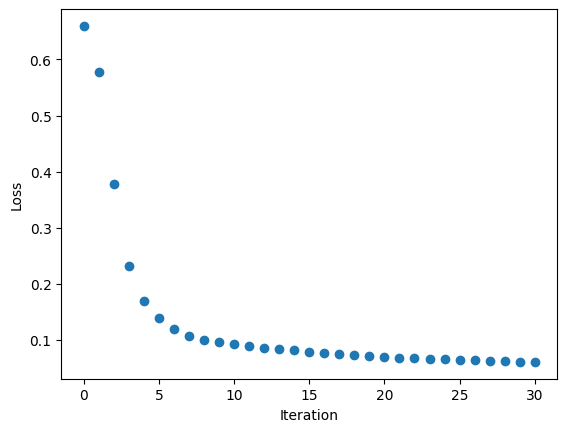


Loss vs epoch using Gradient tape Neural network:


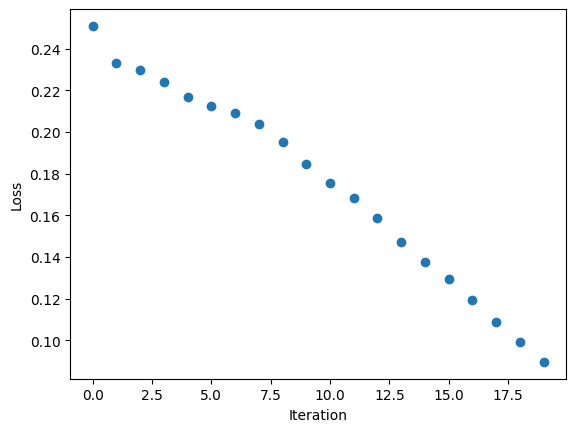


**Accuracy using Manual NN: ~0.97**

**Accuracy using Gradient tape NN: ~0.96**